Mercedes-Benz Greener Manufacturing
Course-end Project 1

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

In [1]:
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
ben = read_csv("train/train.csv")
bentst = read_csv("test/test.csv")

In [3]:
ben.select_dtypes(include='object')

In [4]:
ben_des = ben.describe()
bentst_des = bentst.describe()
ben_des.T

In [5]:
# to apply same dimentionality reduction on text data, same columns should be represented in train and test data
# Therfore, both the columns in train and test with var=0 should be dropped from bot of them. 
zerovars = list(ben_des.columns[ben_des.T['std'] == 0.0]) + list(bentst_des.columns[bentst_des.T['std'] == 0.0]) 
bentgt = ben['y']
ben.drop(zerovars+['ID','y'], axis=1, inplace=True)
bentst.drop(zerovars+['ID'], axis=1, inplace=True)
# ben.columns[ben.isna().sum() > 1]
# ben.columns[ben.isnull().sum() > 1]
# bentst.columns[bentst.isnull().sum() > 1]
# bentst.columns[bentst.isna().sum() > 1]

In [6]:
print(ben_des.columns[ben_des.T['std'] == 0.0]); print(bentst_des.columns[bentst_des.T['std'] == 0.0])
print(ben.shape,bentst.shape)

In [7]:
cats = ben.describe(include='object').columns
cats

In [8]:
 bentst.describe(include='object').columns

In [9]:
ben.describe(include='object')

In [10]:
bentst.describe(include='object')

In [11]:
# seperate label encoding for train and test data
le = LabelEncoder()
ben[cats] = ben[cats].apply(le.fit_transform)
bentst[cats] = bentst[cats].apply(le.fit_transform)


In [80]:
sc, pcatst = Normalizer(), PCA(random_state=80)
pca, xgbr = PCA(n_components=20,random_state=50), XGBRegressor(random_state=10)

dim_dectPipe = Pipeline([('stnd_scale',sc),('dim_redu',pcatst)])
opr_pipe = Pipeline([('stnd_scale',sc),('dim_redu',pca)])
dimtst = dim_dectPipe.fit_transform(ben)

## 20 dimensions provides greater than 98% of the total variance, PCA with 20 dimensions suffices

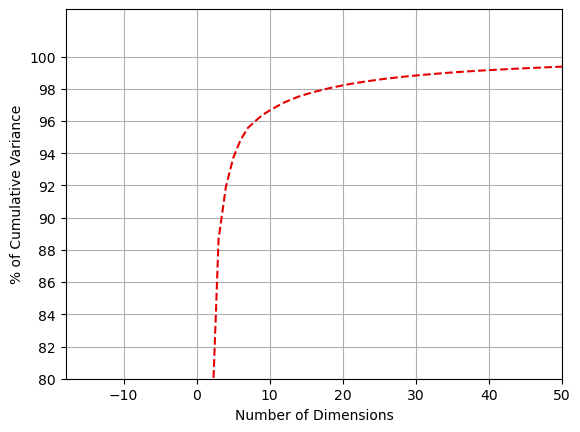

In [81]:
varrat = (10**2)*pcatst.explained_variance_ratio_
# len(varrat[varrat>=0.1])
plt.plot(np.cumsum(varrat),'--', color='#E50000')
plt.grid(True)
plt.yticks(np.append(np.arange(0, 80, step=20), np.arange(80, 101, step=2)))
plt.xlim(right=50)
plt.ylim(bottom=80)
plt.xlabel('Number of Dimensions')
plt.ylabel('% of Cumulative Variance')
plt.show()

In [82]:
train = opr_pipe.fit_transform(ben)
xgbben = xgbr.fit(train,bentgt)
test = opr_pipe.fit_transform(bentst)
xgbpred = xgbr.predict(test)

In [83]:
print(
mean_squared_error(bentgt, xgbpred, squared=False),
r2_score(bentgt, xgbpred)
)

16.03247184613587 -0.5992193762745639


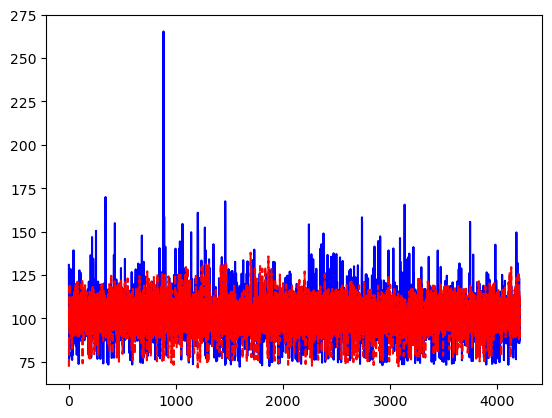

In [84]:
x_axis = np.arange(1,len(bentgt)+1)
plt.plot(x_axis, bentgt,'b-' ,x_axis, xgbpred, 'r--' )
plt.show()